In [1]:
from scipy.signal import lfilter, tf2zpk, zpk2tf, freqz, group_delay 

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [31]:
from math import e, pi, sin, cos

In [5]:
%matplotlib inline

In [6]:
def plot_response(w, h) :
    fig = plt.figure ()
    ax1 = fig.add_subplot (111)
    plt.title ('Frequency response')
    plt.plot (w, 20 * np.log10 (abs (h)), 'b')
    plt.ylabel ('Amplitude (dB)', color = 'b')
    plt.xlabel ('Freq [rad/sample]')

    ax2 = ax1.twinx ()
    angles = np.unwrap (np.angle (h))
    plt.plot (w, angles, 'g')
    plt.ylabel ('Angle (rad)', color = 'g')
    plt.grid ()
    plt.axis ('tight')
    plt.show ()

In [7]:
def plot_delay(w, d) :
    fig = plt.figure ()
    ax1 = fig.add_subplot (111)
    plt.title ('Group delay')
    plt.plot (w, d, 'b')
    plt.ylabel ('Delay', color = 'b')
    plt.xlabel ('Freq [rad/sample]')

    plt.grid ()
    plt.axis ('tight')
    plt.show ()

## First example ##

W.-S. Lu. Design of stable IIR digital filters with equiripple
passbands and peak-constrained least-squares stopbands.
IEEE Transactions on Circuits and Systems II: 85
Analog and Digital Signal Processing, 46(11):1421–1426,
November 1999.

Page 1423, plot page 1424

In [8]:
b0 = 0.015251585
zeros = [  1.40060806+0.52562938j
        ,  0.71218856+1.31038625j
        , -0.34154833+0.94477549j
        , -0.72080392+0.77084135j
        , -1.07931648+0.26358750j
        , -1.10339797+0.12036580j
        ]
poles = [ -0.55252815
        , -0.93489129+0.14881956j
        , -0.13041701+0.92361074j
        ,  0.10577534+0.70463643j
        ,  0.38840193+0.48449893j
        ,  0.56325419+0.17664608j
        ]
z2 = [k.conjugate () for k in zeros if k.imag]
p2 = [k.conjugate () for k in poles if k.imag]
zeros = zeros + z2
poles = poles + p2

In [9]:
(b, a) = zpk2tf (zeros, poles, b0)
w, h = freqz (b, a)
wgd, gd = group_delay ((b, a))

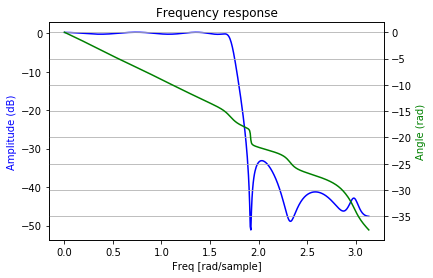

In [10]:
plot_response (w, h)

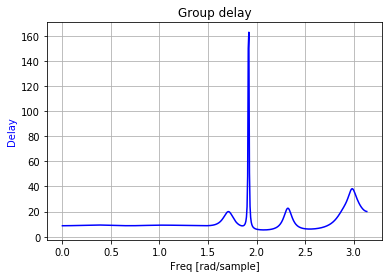

In [11]:
plot_delay (wgd, gd)

## Second example ##

W.-S. Lu. Design of stable IIR digital filters with equiripple
passbands and peak-constrained least-squares stopbands.
IEEE Transactions on Circuits and Systems II: 85
Analog and Digital Signal Processing, 46(11):1421–1426,
November 1999.

Page 1425, plot on same page.


In [12]:
b0 = -0.00046047527
zeros = [ 18.63131093
        ,  1.49675301+0.48221524j
        ,  0.89762684+1.22910309j
        , -0.99895376+0.20015069j
        , -0.20222995+0.97998167j
        , -0.84535803+0.56243645j
        , -0.35458606+0.93926134j
        , -0.59858640+0.81318261j
        ]
poles = [  0.20628660
        ,  0.055677115+0.55763187j
        , -0.032471477+0.93555574j
        ,  0, 0, 0, 0, 0, 0, 0, 0, 0, 0
        ]
z2 = [k.conjugate () for k in zeros if k.imag]
p2 = [k.conjugate () for k in poles if k.imag]
zeros = zeros + z2
poles = poles + p2

In [13]:
(b, a) = zpk2tf (zeros, poles, b0)
w, h = freqz (b, a)
wgd, gd = group_delay ((b, a))

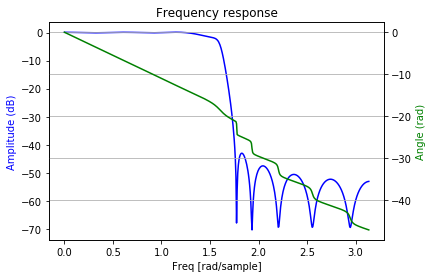

In [14]:
plot_response (w, h)

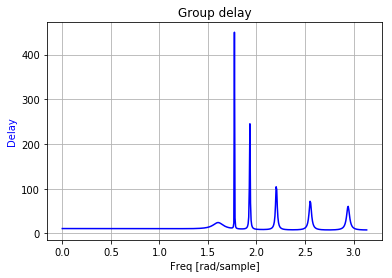

In [15]:
plot_delay (wgd, gd)

## Third example ##
#### Taken from:

Rainer Storn. Differential evolution design of an IIR-filter with
requirements for magnitude and group delay. Technical Report
TR-95-026, International Computer Science Institute (ICSI), June
1995.

#### See also:

Rainer Storn. Differential evolution design of an IIR-filter. In
IEEE International Conference on Evolutionary Computation
(ICEC), pages 268–273, Nagoya, Japan, May 1996.

Reportedly this is a 7-degree FIR Pre-response-filter. But it only has 4 parameters. Hmm.

Note that the Frequency response is bogus, see the next graphics reconstructed from the frequency-response formula (13) from the technical report above. But we still don't know the design of the FIR-Pre-Filter.

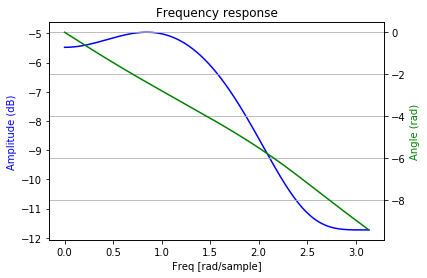

In [29]:
fir = [-0.033271, -0.019816, 0.169865, 0.415454]
#fir = [x - 3.5 for x in fir]
#fir = [x * 2 * pi for x in fir]
zeros, poles, gain = tf2zpk (fir, [1.0])
#print (zeros, poles, gain)
w, h = freqz (fir)
plot_response (w, h)

This is the frequency response of the Pre-Filter according to 

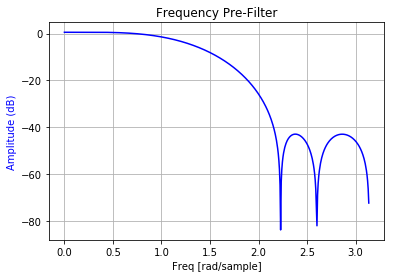

In [44]:
xa = []
ya = []
for i in  range (512) :
    phi = i / 512. * pi
    xa.append (phi)
    y = 0.0
    for k in range (4) :
        y += fir [k] * 2 * cos (phi * (k - 3.5))
    ya.append (abs (y))
fig = plt.figure ()
ax1 = fig.add_subplot (111)
plt.title ('Frequency Pre-Filter')
plt.plot (xa, 20 * np.log10 (ya), 'b')
plt.ylabel ('Amplitude (dB)', color = 'b')
plt.xlabel ('Freq [rad/sample]')

plt.grid ()
plt.axis ('tight')
plt.show ()

Parameters:
The first 5 are the radii of the zeros, the next five the angles of the zeros.
Then follow 4 radii of poles and 4 angles of poles.

In [24]:
a0_1 = 0.00390625
params1 = \
 [ 1.620493889,  1.006124616,  1.016987443,  2.498671532,   1.919012547
 , 0.2243566662, 0.3745155931, 0.4304945767, 0.02474720217, 0.1109348238
 , 0.6369678974, 0.4702593982, 0.408888042,   0.8722907901
 , 0.2370584458, 0.125761658,  0.05192748457, 0.3109594584
 ]
a0_2 = 0.01
params2 = \
 [ 1.70534277,   1.019881606,  1.558364391,  1.001873851, 1.829733968
 , 0.1320674717, 0.3776784241, 0.2309984416, 0.4321155548, 0.04620760679
 , 0.8493334651, 0.3932341039,  0.6438843012, 0.5428563952
 , 0.3089904487, 0.01219726913, 0.2359268814, 0.124328509
 ]
zeros1 = [params1 [k]    * e ** (2j * pi * params1 [k+5])  for k in range (5)]
poles1 = [params1 [k+10] * e ** (2j * pi * params1 [k+14]) for k in range (4)]
zeros2 = [params2 [k]    * e ** (2j * pi * params2 [k+5])  for k in range (5)]
poles2 = [params2 [k+10] * e ** (2j * pi * params2 [k+14]) for k in range (4)]
# FIR-Pre-Filter: Multiply with other filter should convolve the first + second?
zeros1.extend (list (zeros))
zeros2.extend (list (zeros))
(b1, a1) = zpk2tf (zeros1, poles1, a0_1)
w1, h1 = freqz (b1, a1)
wgd1, gd1 = group_delay ((b1, a1))
(b2, a2) = zpk2tf (zeros2, poles2, a0_2)
w2, h2 = freqz (b2, a2)
wgd2, gd2 = group_delay ((b2, a2))

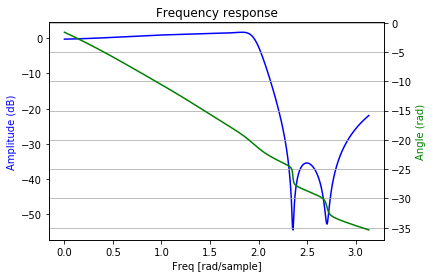

In [25]:
plot_response (w1, h1)

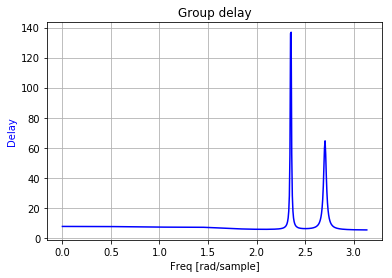

In [26]:
plot_delay (wgd1, gd1)

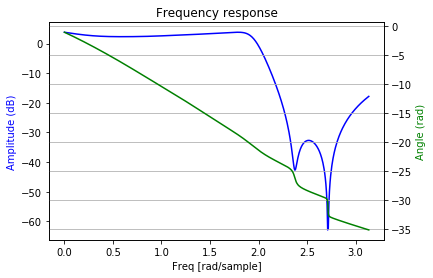

In [27]:
plot_response (w2, h2)

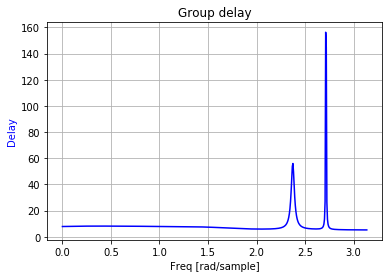

In [28]:
plot_delay (wgd2, gd2)